# Random Forest And Decision Trees
Implementation of random forest and tree algorithm on cancer data using scikit learn.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set_style('darkgrid')
%matplotlib inline

### Loading dataset from scikit-learn

In [66]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Printing out target and feature names in our dataset.

In [67]:
print('Target Names:')
print(cancer['target_names'])
print('\n')
print('Feature Names:')
print(cancer['feature_names'])

Target Names:
['malignant' 'benign']


Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Creating pandas dataframe for EDA
Using pandas to create a dataframe.

In [68]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
df.shape

(569, 30)

### Visual Exploratory Data Analysis
Scatter plot of **mean perimeter**, **worst perimeter**, to see the correlation.

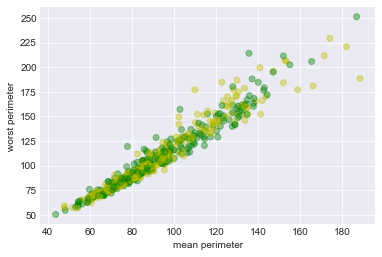

In [73]:
color = ['y','g']
plt.scatter(df['mean perimeter'],df['worst perimeter'],color=color,alpha=0.4);
plt.xlabel('mean perimeter')
plt.ylabel('worst perimeter')

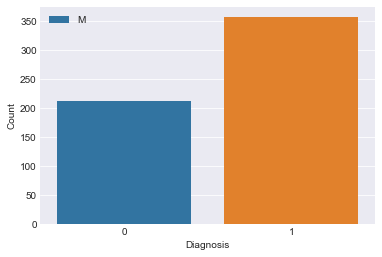

In [139]:
sns.countplot(cancer['target']);
plt.xlabel('Diagnosis');
plt.ylabel('Count');
plt.legend(labels='Malignant');

### Setting training and test data

In [ ]:
X = df
y = cancer['target']

Using scikit learn train_test_split to split the data.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

Importing tree model and fitting our training data.

In [76]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()

In [77]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Model Evaluation
Looks like tree model did well, but **False Negative** is still high.

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.89      0.91      0.90        64
          1       0.94      0.93      0.94       107

avg / total       0.92      0.92      0.92       171



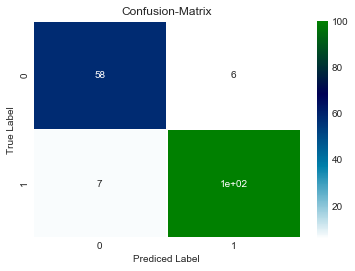

In [79]:
sns.heatmap(cm, annot=True, cmap='ocean_r', linewidth=0.8);
plt.title('Confusion-Matrix');
plt.xlabel('Prediced Label');
plt.ylabel('True Label');

### Visual Decision Tree using Graphviz

In [80]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer")

'breast_cancer.pdf'

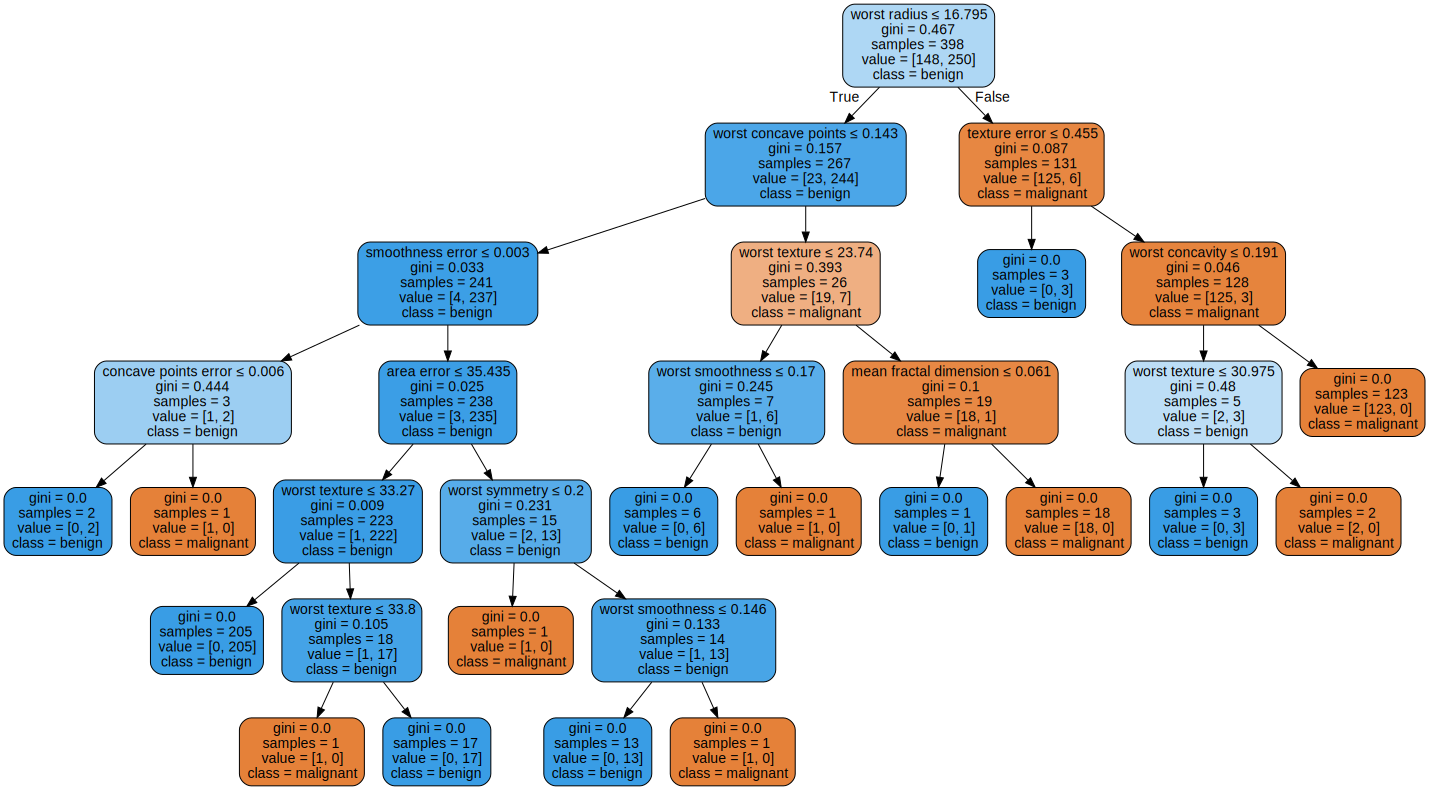

In [81]:
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Random Forest
Using random forest classifier to train the model.

In [110]:
from sklearn.ensemble import RandomForestClassifier
RForest_classifier = RandomForestClassifier(n_estimators=300,random_state=101)

In [111]:
RForest_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [112]:
pred = RForest_classifier.predict(X_test)
cm = confusion_matrix(y_test,pred)

### Evaluating Performance
Random forest has reduced **False Negative** error rate and accuracy has improved too.

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        64
          1       0.95      0.97      0.96       107

avg / total       0.95      0.95      0.95       171



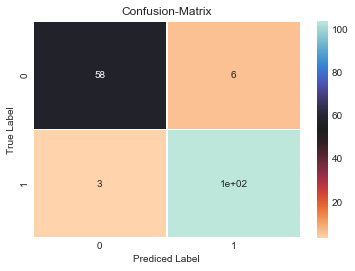

In [113]:
sns.heatmap(cm, annot=True, cmap='icefire_r', linewidth=0.8)
plt.title('Confusion-Matrix');
plt.xlabel('Prediced Label');
plt.ylabel('True Label');
print(classification_report(y_test,pred))